In [2]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 666.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 872.1/872.1 kB 6.6 MB/s eta 0:00:00


In [3]:
from ultralytics import YOLO
import os
from IPython.display import Image, display
from IPython import display
display.clear_output()

In [4]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="IRGjsg5aNhVEESgTVfux")
project = rf.workspace("roboflow-universe-projects").project("license-plate-recognition-rxg4e")
version = project.version(4)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 2.9 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.8
    Uninstalling idna-3.8:
      Successfully uninstalled idna-3.8
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.87, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to License-Plate-Recognition-4 in yolov8:: 100%|██████████| 48488/48488 [00:07<00:00, 6686.01it/s]


In [6]:
# Start training a YOLOv8 model using the Roboflow dataset
# The command to train the YOLOv8 model using the downloaded dataset
!yolo task=detect mode=train model=yolov8n.pt data={dataset.location}/data.yaml epochs=10 imgsz=600

Ultralytics YOLOv8.2.87 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/License-Plate-Recognition-4/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=600, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_

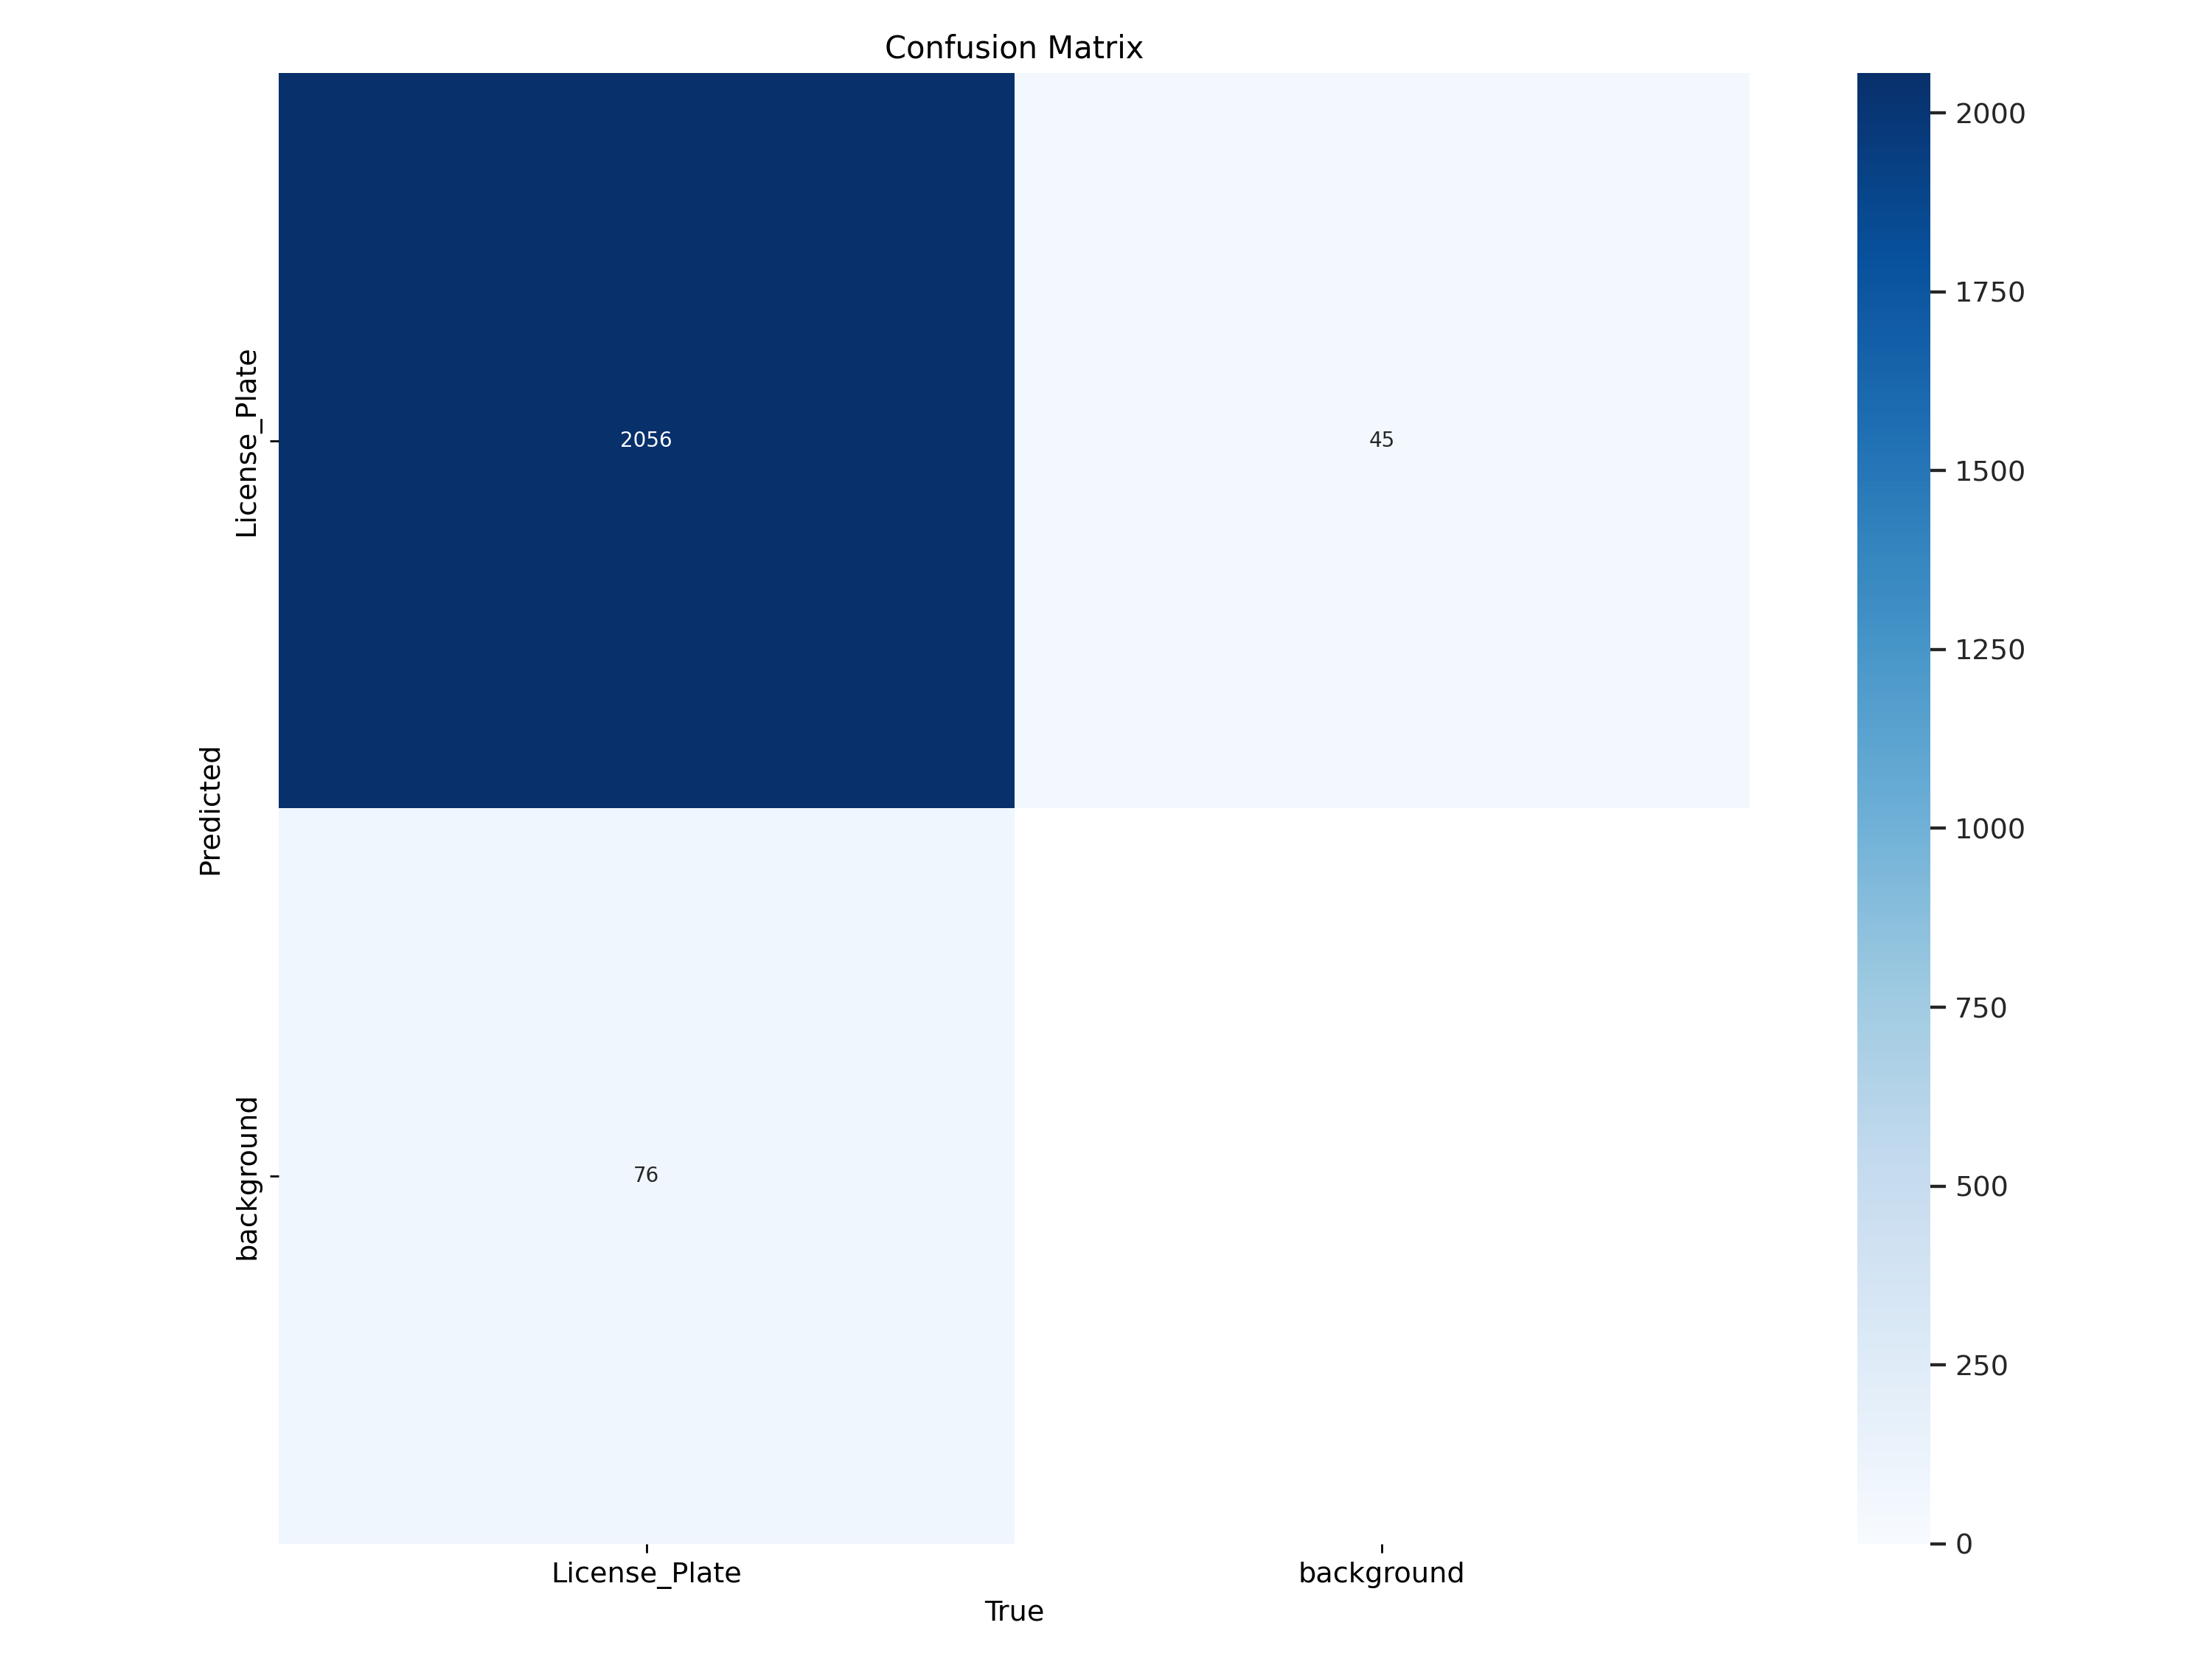

In [7]:
Image(filename='/content/runs/detect/train2/confusion_matrix.png',height=600)

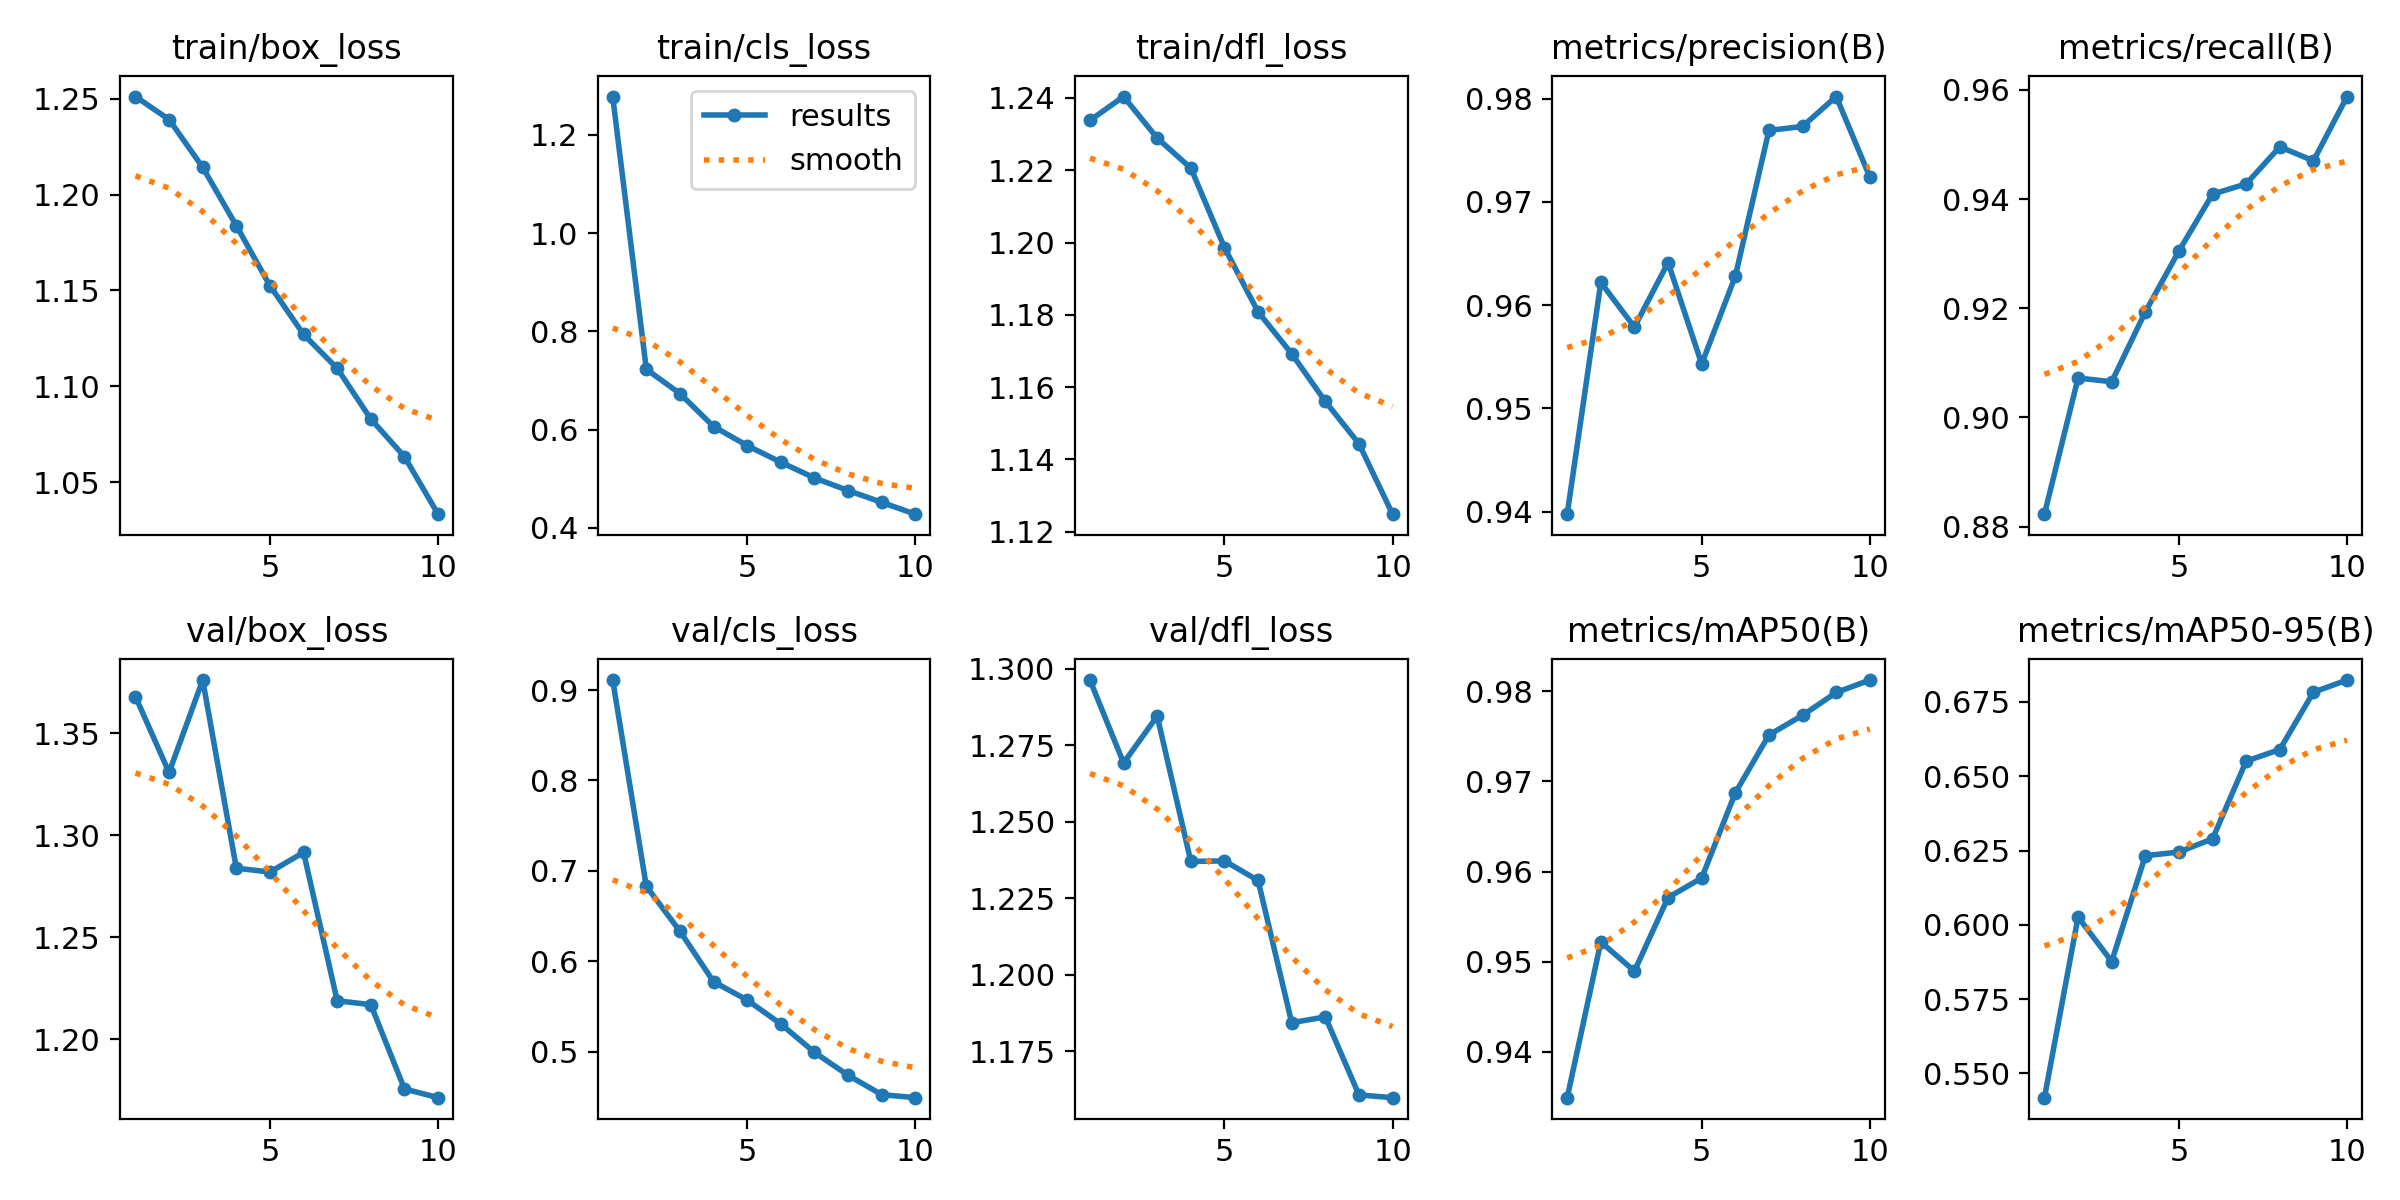

In [8]:
Image(filename='/content/runs/detect/train2/results.png', height=600)

In [11]:
!yolo task=detect mode=predict model=/content/runs/detect/train2/weights/best.pt source='/content/images.jpeg'

Ultralytics YOLOv8.2.87 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/images.jpeg: 480x608 1 License_Plate, 44.3ms
Speed: 6.8ms preprocess, 44.3ms inference, 688.9ms postprocess per image at shape (1, 3, 480, 608)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [14]:
!yolo task=detect mode=predict model=/content/runs/detect/train2/weights/best.pt source='/content/runs/detect/predict/images.jpeg'

Ultralytics YOLOv8.2.87 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/runs/detect/predict/images.jpeg: 480x608 1 License_Plate, 45.3ms
Speed: 6.7ms preprocess, 45.3ms inference, 569.9ms postprocess per image at shape (1, 3, 480, 608)
Results saved to runs/detect/predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict


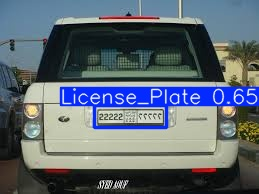

In [15]:
Image(filename="//content/runs/detect/predict/images.jpeg", height=600)

In [16]:
!pip install ultralytics -q

In [17]:
import cv2
from ultralytics import YOLO, solutions

In [18]:
model = YOLO('/content/runs/detect/train2/weights/best.pt')

In [19]:
cap = cv2.VideoCapture('/content/a.mp4')
assert cap.isOpened(), 'Error reading video file'
w, h, fps = (int(cap.get(x)) for x in (cv2.CAP_PROP_FRAME_WIDTH, cv2.CAP_PROP_FRAME_HEIGHT, cv2.CAP_PROP_FPS))

In [20]:
mid_y = h // 2
line_points = [(20, mid_y), (w - 20, mid_y)]

In [21]:
video_writer = cv2.VideoWriter('object_counting_output.mp4', cv2.VideoWriter_fourcc(*'mp4v'), fps, (w, h))

In [22]:
counter = solutions.ObjectCounter(
    view_img=True,
    reg_pts=line_points,
    names=model.names,
    draw_tracks=True,
    line_thickness=2,
)

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()

Line Counter Initiated.


In [23]:
while cap.isOpened():
    success, im0 = cap.read()
    if not success:
        print('Video frame is empty or video processing has been successfully completed.')
        break

    # Perform object tracking
    tracks = model.track(im0, persist=True, show=False)

    # Count objects and draw the middle line
    im0 = counter.start_counting(im0, tracks)
    video_writer.write(im0)

requirements: Ultralytics requirement ['lapx>=0.5.2'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 9.6 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 2.8s, installed 1 package: ['lapx>=0.5.2']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


0: 416x608 1 License_Plate, 45.0ms
Speed: 7.4ms preprocess, 45.0ms inference, 519.9ms postprocess per image at shape (1, 3, 416, 608)

0: 416x608 1 License_Plate, 7.9ms
Speed: 2.5ms preprocess, 7.9ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 608)

0: 416x608 1 License_Plate, 7.4ms
Speed: 2.1ms preprocess, 7.4ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 608)

0: 416x608 1 License_Plate, 7.2ms
Speed: 2.0ms preprocess, 7.2ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 608)

0: 416x608 1 License_Plate, 7.4ms
Speed: 2.0ms preprocess, 7.4ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 608)

0: 416x608 1 Lice

In [24]:
cap.release()
video_writer.release()
cv2.destroyAllWindows()